# Module 

In [10]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import matplotlib.pyplot as plt
import gzip
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import seaborn as sns
from src.utils.plot_utils import count_plot
from src.Pipeline.XGBoostPipeline import XGBoostPipeline
# from src.FeatureCreator.XGBoostFeatureCreator
# import numba
from src.utils.plot_utils import plot_feature_importances
from src.utils.pca_utils import plot_pca_res
from src.config import timestamp_cols, cate_features
from src.FeatureCreator.XGBoostFeatureCreator import XGBoostFeatureCreator
# from src.utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Config

In [5]:
feature_dir = "../model_training/v6_xgb_1113/"
feature_file = '../model_training/v6_xgb_1113/features.csv'
feature_file_reduced_mem = '../model_training/v6_xgb_1113/features.csv'
target = 'delivery_time'

feature_col_file = 'feature_cols.pickle'


addition_col = [target] + [col+"_date" for col in timestamp_cols]

# Function 

# Feature Analysis

In [11]:
fc = XGBoostFeatureCreator(feature_dir=feature_dir)

In [13]:
df, feature_cols = fc.all_features, fc.feature_cols

In [14]:
# df = pd.read_csv(feature_file_reduced_mem)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769969 entries, 0 to 769968
Columns: 400 entries, RestaurantId to CityIddayofweekhour_delivery_time_28d_min_dt
dtypes: bool(1), float64(393), int64(5), object(1)
memory usage: 2.3+ GB


In [16]:
df.head()

,RestaurantId,CityId,month,day,hour,dayofweek,holiday,delivery_time,RestaurantId_diff_NewOrder_DriverAssigned_5min_avg_dt,RestaurantId_diff_NewOrder_DriverAssigned_5min_max_dt,...,realtime_ongoing_order_number_RestaurantId_DriverAtTheRestaurant,realtime_ongoing_order_number_RestaurantId_DriverLeftTheRestaurant,realtime_ongoing_order_number_RestaurantId_DriverAtTheDoor,realtime_ongoing_order_number_RestaurantId_Delivered,RestaurantIddayofweekhour_delivery_time_28d_avg_dt,RestaurantIddayofweekhour_delivery_time_28d_max_dt,RestaurantIddayofweekhour_delivery_time_28d_min_dt,CityIddayofweekhour_delivery_time_28d_avg_dt,CityIddayofweekhour_delivery_time_28d_max_dt,CityIddayofweekhour_delivery_time_28d_min_dt
0,1015,Springfield,10,1,7,3,False,40.56,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1020,Gotham City,10,1,7,3,False,22.34,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1011,Gotham City,10,1,7,3,False,51.50,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1044,Gotham City,10,1,7,3,False,21.92,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1100,Gotham City,10,1,7,3,False,32.40,0.0,0.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.columns

Index(['RestaurantId', 'CityId', 'month', 'day', 'hour', 'dayofweek',
       'holiday', 'delivery_time',
       'RestaurantId_diff_NewOrder_DriverAssigned_5min_avg_dt',
       'RestaurantId_diff_NewOrder_DriverAssigned_5min_max_dt',
       ...
       'realtime_ongoing_order_number_RestaurantId_DriverAtTheRestaurant',
       'realtime_ongoing_order_number_RestaurantId_DriverLeftTheRestaurant',
       'realtime_ongoing_order_number_RestaurantId_DriverAtTheDoor',
       'realtime_ongoing_order_number_RestaurantId_Delivered',
       'RestaurantIddayofweekhour_delivery_time_28d_avg_dt',
       'RestaurantIddayofweekhour_delivery_time_28d_max_dt',
       'RestaurantIddayofweekhour_delivery_time_28d_min_dt',
       'CityIddayofweekhour_delivery_time_28d_avg_dt',
       'CityIddayofweekhour_delivery_time_28d_max_dt',
       'CityIddayofweekhour_delivery_time_28d_min_dt'],
      dtype='object', length=400)

In [18]:
df[feature_cols].isna().sum().sum()

0

TODO ??

In [20]:
(df[feature_cols]==0).sum()

day                                                       0
hour                                                      4
month                                                     0
dayofweek                                             92805
RestaurantId                                              0
                                                      ...  
RestaurantIddayofweekhour_delivery_time_28d_max_dt    56971
RestaurantIddayofweekhour_delivery_time_28d_min_dt    56971
CityIddayofweekhour_delivery_time_28d_avg_dt          13040
CityIddayofweekhour_delivery_time_28d_max_dt          13040
CityIddayofweekhour_delivery_time_28d_min_dt          13040
Length: 399, dtype: int64

# Model Importance 

In [23]:
model_dir = "../model_training/v7_logxgb_1113/"
# model_dir = "../model_training/v4_xgb_1112/"

In [24]:
pipeline = XGBoostPipeline(model_path=model_dir, model_training=False, model_params={})

/Users/mac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator OrdinalEncoder from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
/Users/mac/opt/miniconda3/lib/python3.9/site-packages/sklearn/base.py:310: UserWarning: Trying to unpickle estimator Pipeline from version 1.0.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [25]:
model = pipeline.pipeline['model']
feature_cols = model.get_booster().feature_names

In [80]:
model.get_xgb_params

<bound method XGBModel.get_xgb_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)>

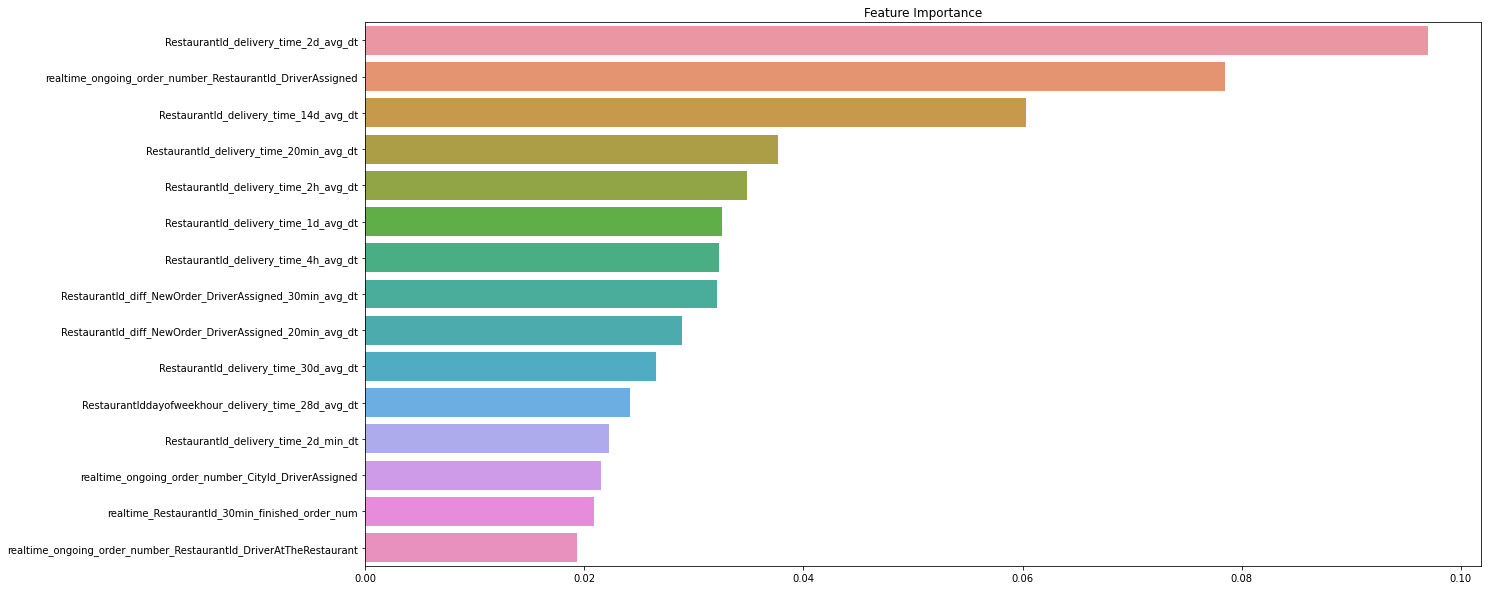

In [79]:
plot_feature_importances(model, feature_cols, show_feature_num=15, figsize=(20, 10), fig_dir='../report/img/')

In [29]:
# feature_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

In [30]:
# feature_imp = pd.DataFrame(model.feature_importances_, index=feature_cols)#.sort_values(ascending=False)
feature_imp = pd.DataFrame({
    'feature': feature_cols
    , 'importance': model.feature_importances_,
}).sort_values(by='importance', ascending=False)
feature_imp['imp_rank'] = range(1, len(feature_cols)+1)

In [31]:
feature_imp

,feature,importance,imp_rank
316,RestaurantId_delivery_time_2d_avg_dt,0.096996,1
388,realtime_ongoing_order_number_RestaurantId_Dri...,0.078441,2
325,RestaurantId_delivery_time_14d_avg_dt,0.060310,3
298,RestaurantId_delivery_time_20min_avg_dt,0.037672,4
307,RestaurantId_delivery_time_2h_avg_dt,0.034891,5
...,...,...,...
149,RestaurantId_diff_DriverAtTheRestaurant_Driver...,0.000000,395
97,RestaurantId_diff_DriverAssigned_DriverAtTheRe...,0.000000,396
99,RestaurantId_diff_DriverAssigned_DriverAtTheRe...,0.000000,397
101,RestaurantId_diff_DriverAssigned_DriverAtTheRe...,0.000000,398


In [33]:
# feature_imp.to_csv('../logs/feature_importance_v5.csv', index=False)

In [34]:
feature_imp.head(20)

,feature,importance,imp_rank
316,RestaurantId_delivery_time_2d_avg_dt,0.096996,1
388,realtime_ongoing_order_number_RestaurantId_Dri...,0.078441,2
325,RestaurantId_delivery_time_14d_avg_dt,0.060310,3
298,RestaurantId_delivery_time_20min_avg_dt,0.037672,4
307,RestaurantId_delivery_time_2h_avg_dt,0.034891,5
313,RestaurantId_delivery_time_1d_avg_dt,0.032571,6
310,RestaurantId_delivery_time_4h_avg_dt,0.032305,7
16,RestaurantId_diff_NewOrder_DriverAssigned_30mi...,0.032100,8
13,RestaurantId_diff_NewOrder_DriverAssigned_20mi...,0.028930,9
328,RestaurantId_delivery_time_30d_avg_dt,0.026586,10


## Important Feature Analysis 

In [35]:
non_cate_feature_cols = [ele for ele in feature_cols if ele not in cate_features]

In [36]:
cate_features

['RestaurantId', 'CityId']

### PCA 

50 principle components can explain over 95% of the variance

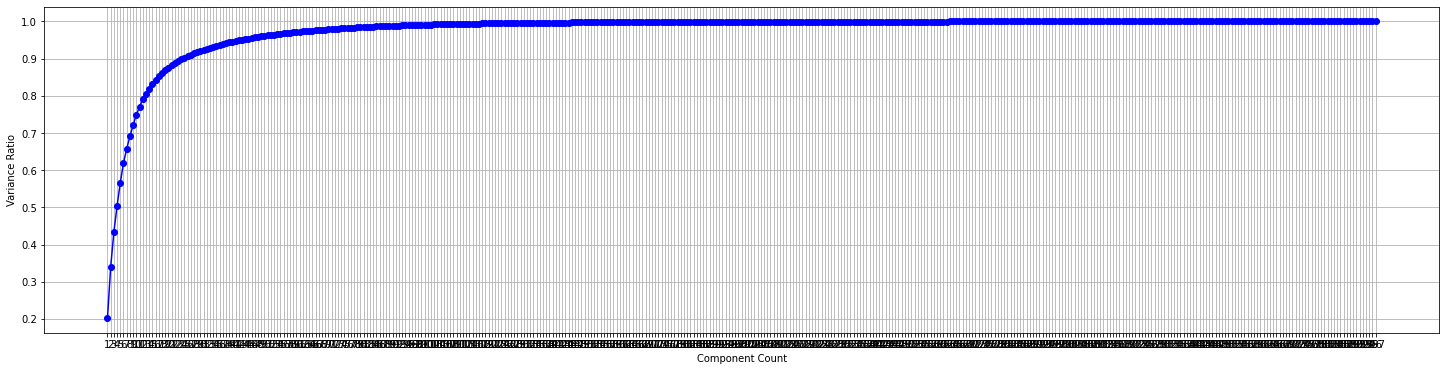

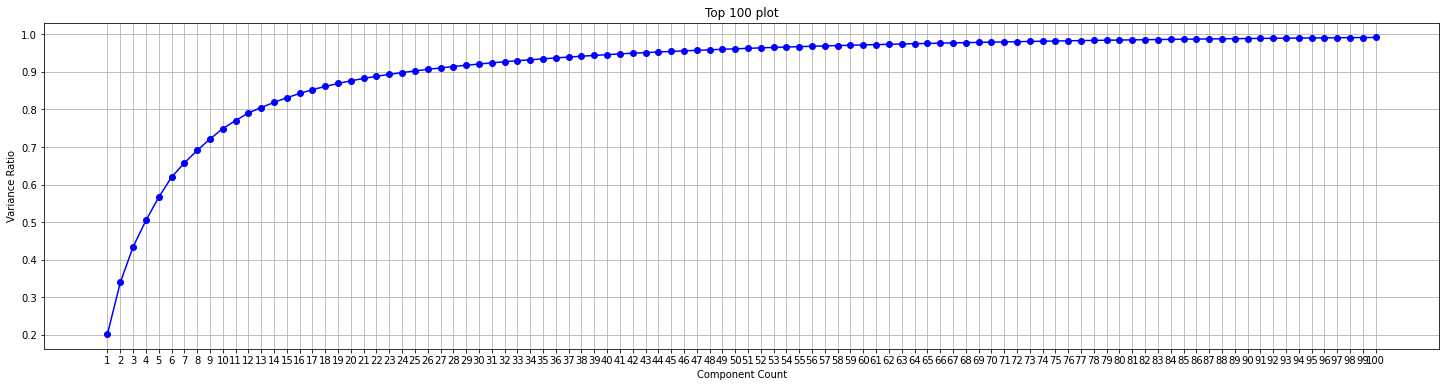

In [60]:
plot_pca_res(df[non_cate_feature_cols].fillna(0), detail_component_num=100)

### Zero, null vlaue 

In [40]:
df[feature_imp.head(10)['feature']].isna().sum()

RestaurantId_delivery_time_2d_avg_dt                         0
realtime_ongoing_order_number_RestaurantId_DriverAssigned    0
RestaurantId_delivery_time_14d_avg_dt                        0
RestaurantId_delivery_time_20min_avg_dt                      0
RestaurantId_delivery_time_2h_avg_dt                         0
RestaurantId_delivery_time_1d_avg_dt                         0
RestaurantId_delivery_time_4h_avg_dt                         0
RestaurantId_diff_NewOrder_DriverAssigned_30min_avg_dt       0
RestaurantId_diff_NewOrder_DriverAssigned_20min_avg_dt       0
RestaurantId_delivery_time_30d_avg_dt                        0
dtype: int64

In [42]:
(df[feature_imp.head(20)['feature']] == 0).sum()/df.shape[0]

RestaurantId_delivery_time_2d_avg_dt                                0.004098
realtime_ongoing_order_number_RestaurantId_DriverAssigned           0.000056
RestaurantId_delivery_time_14d_avg_dt                               0.001203
RestaurantId_delivery_time_20min_avg_dt                             0.863558
RestaurantId_delivery_time_2h_avg_dt                                0.097136
RestaurantId_delivery_time_1d_avg_dt                                0.009841
RestaurantId_delivery_time_4h_avg_dt                                0.074382
RestaurantId_diff_NewOrder_DriverAssigned_30min_avg_dt              0.550986
RestaurantId_diff_NewOrder_DriverAssigned_20min_avg_dt              0.863558
RestaurantId_delivery_time_30d_avg_dt                               0.001121
RestaurantIddayofweekhour_delivery_time_28d_avg_dt                  0.073991
RestaurantId_delivery_time_2d_min_dt                                0.004098
realtime_ongoing_order_number_CityId_DriverAssigned                 0.000004

### Most Important Features 

rank: 1; col: RestaurantId_delivery_time_2d_avg_dt, rank: 1, imp: 0.09699589014053345
Unique num too huge: 2551; cut to 10 categories


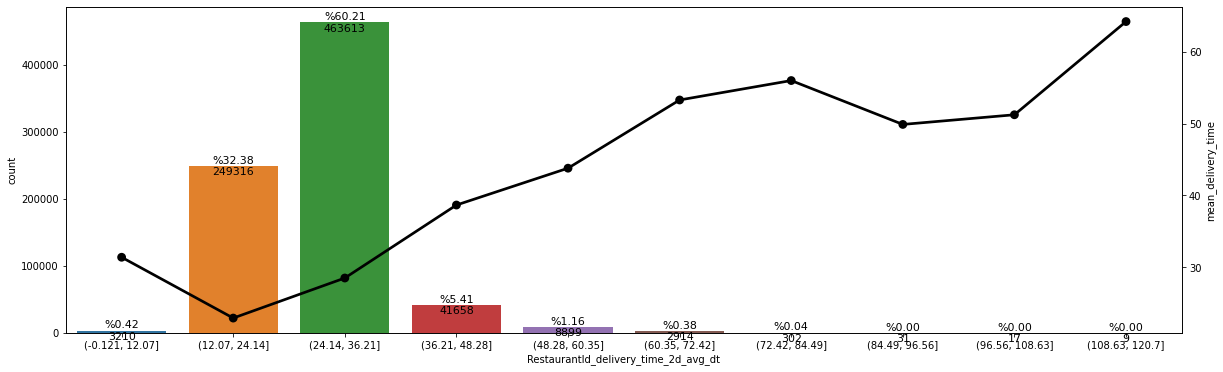

rank: 2; col: realtime_ongoing_order_number_RestaurantId_DriverAssigned, rank: 2, imp: 0.07844091951847076


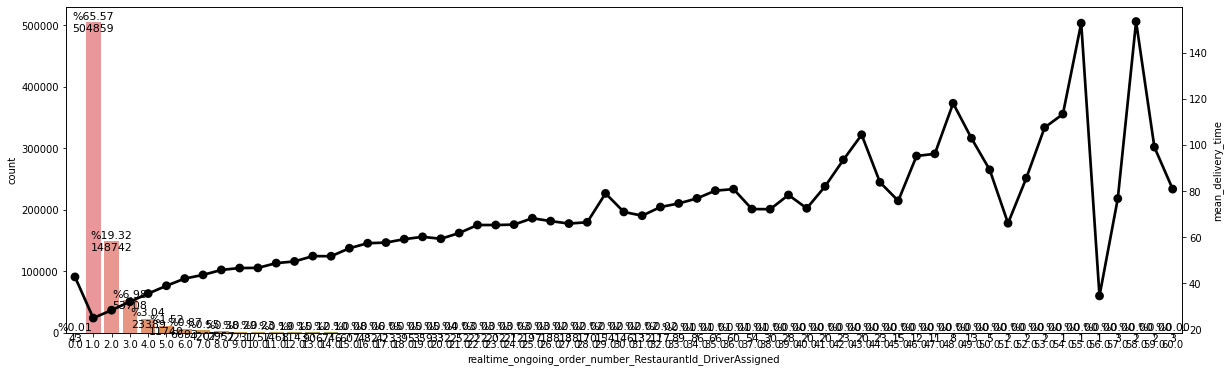

rank: 3; col: RestaurantId_delivery_time_14d_avg_dt, rank: 3, imp: 0.06030989810824394
Unique num too huge: 2168; cut to 10 categories


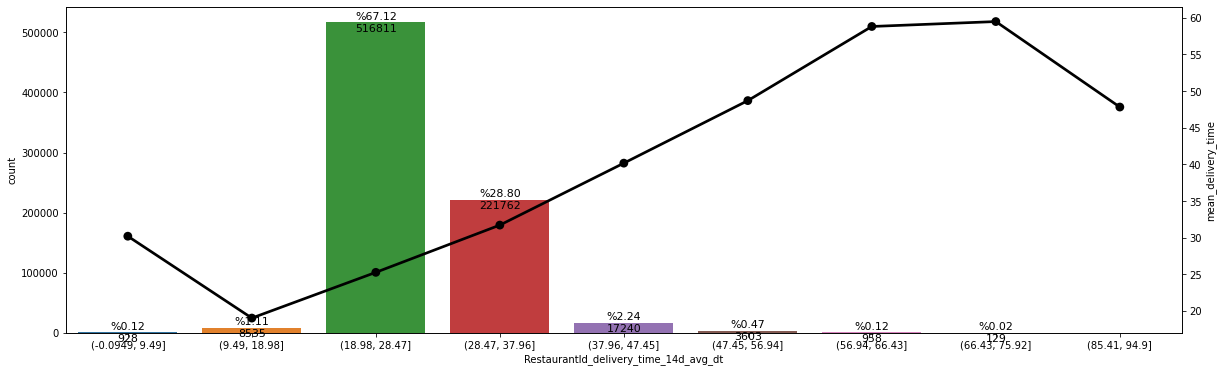

rank: 4; col: RestaurantId_delivery_time_20min_avg_dt, rank: 4, imp: 0.037671592086553574
Unique num too huge: 1175; cut to 10 categories


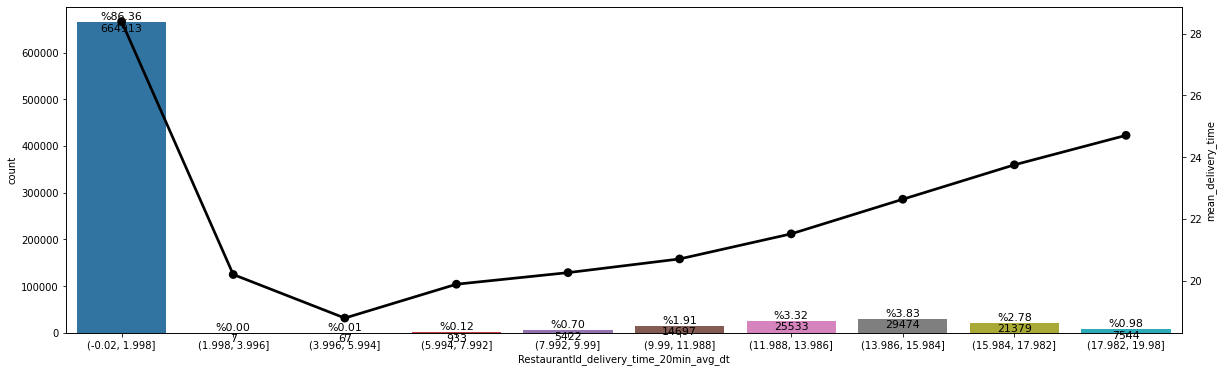

rank: 5; col: RestaurantId_delivery_time_2h_avg_dt, rank: 5, imp: 0.03489061817526817
Unique num too huge: 3191; cut to 10 categories


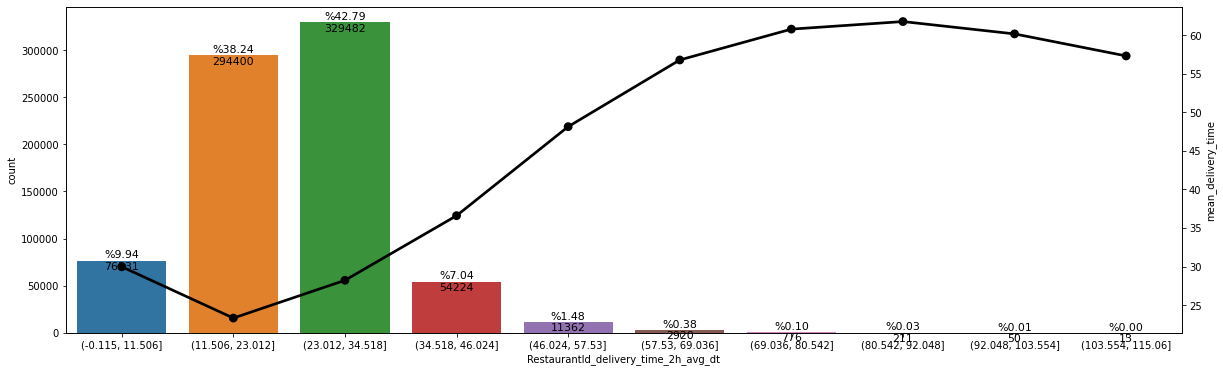

rank: 6; col: RestaurantId_delivery_time_1d_avg_dt, rank: 6, imp: 0.03257118538022041
Unique num too huge: 2707; cut to 10 categories


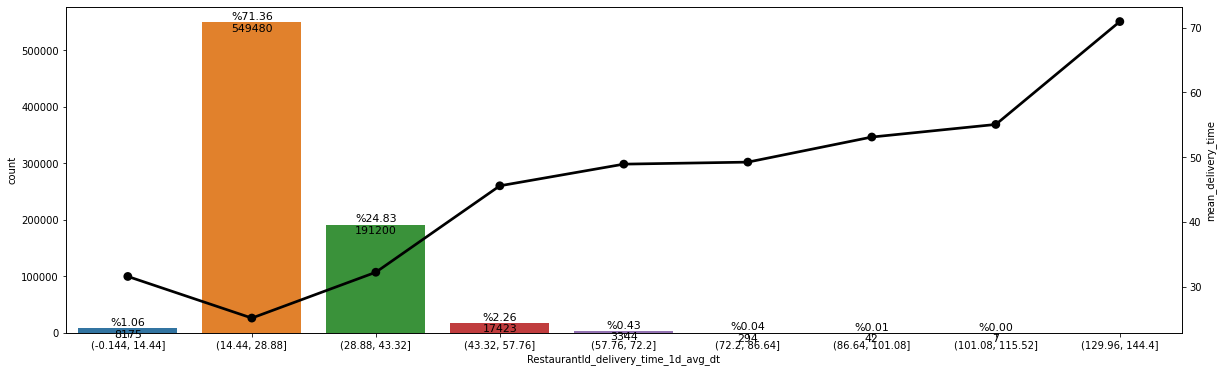

rank: 7; col: RestaurantId_delivery_time_4h_avg_dt, rank: 7, imp: 0.03230507671833038
Unique num too huge: 3100; cut to 10 categories


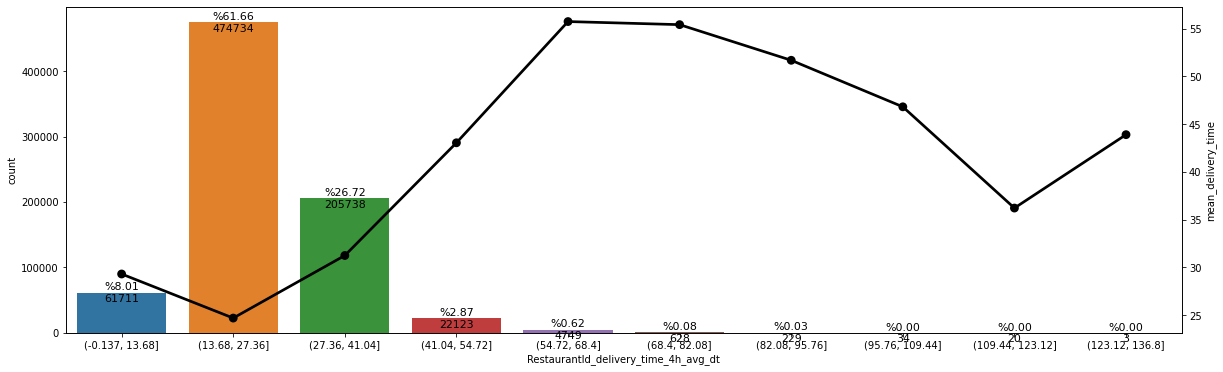

rank: 8; col: RestaurantId_diff_NewOrder_DriverAssigned_30min_avg_dt, rank: 8, imp: 0.0320996530354023
Unique num too huge: 1442; cut to 10 categories


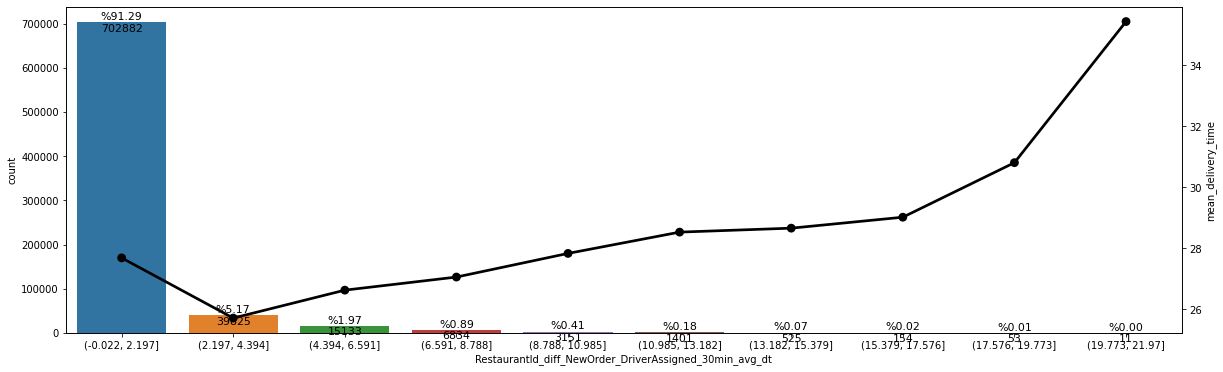

rank: 9; col: RestaurantId_diff_NewOrder_DriverAssigned_20min_avg_dt, rank: 9, imp: 0.028930259868502617
Unique num too huge: 735; cut to 10 categories


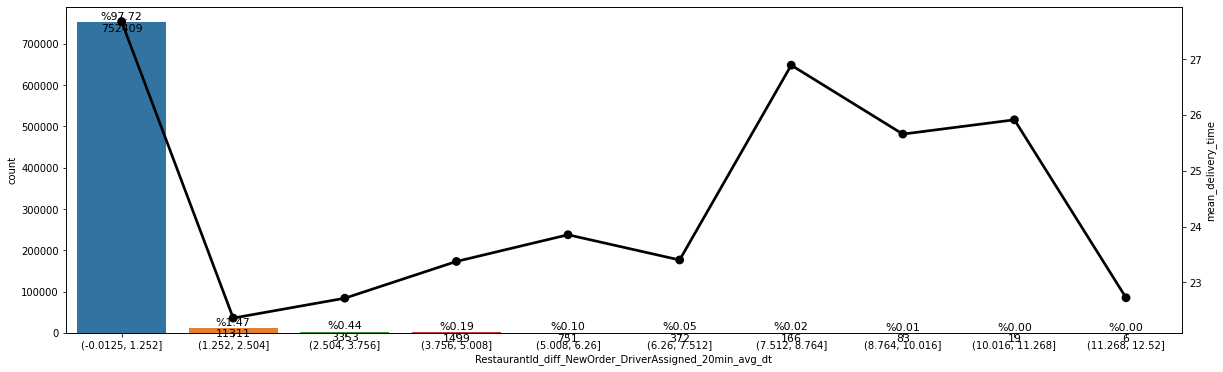

rank: 10; col: RestaurantId_delivery_time_30d_avg_dt, rank: 10, imp: 0.026586102321743965
Unique num too huge: 2097; cut to 10 categories


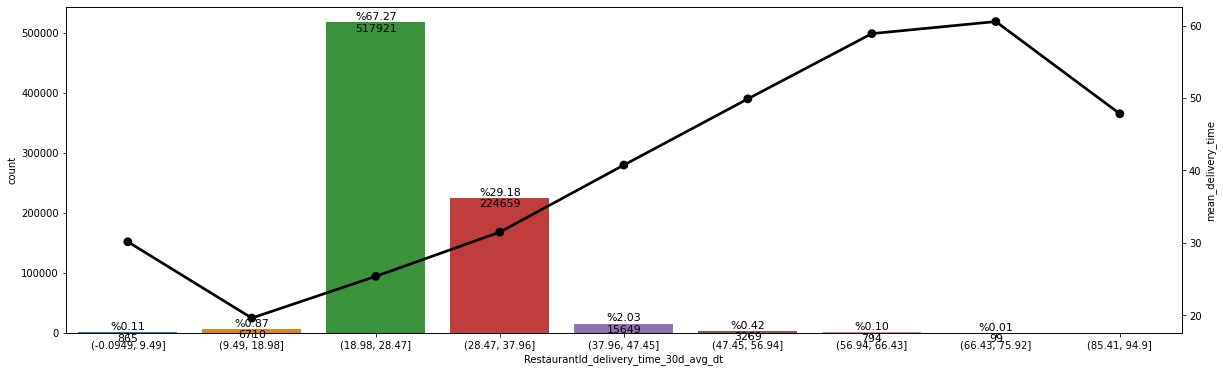

rank: 11; col: RestaurantIddayofweekhour_delivery_time_28d_avg_dt, rank: 11, imp: 0.024204809218645096
Unique num too huge: 3061; cut to 10 categories


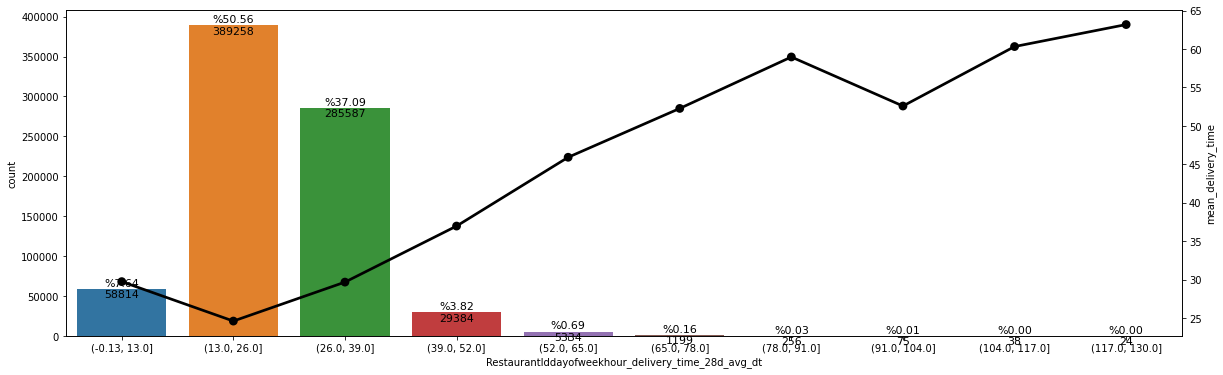

rank: 12; col: RestaurantId_delivery_time_2d_min_dt, rank: 12, imp: 0.022258097305893898
Unique num too huge: 2238; cut to 10 categories


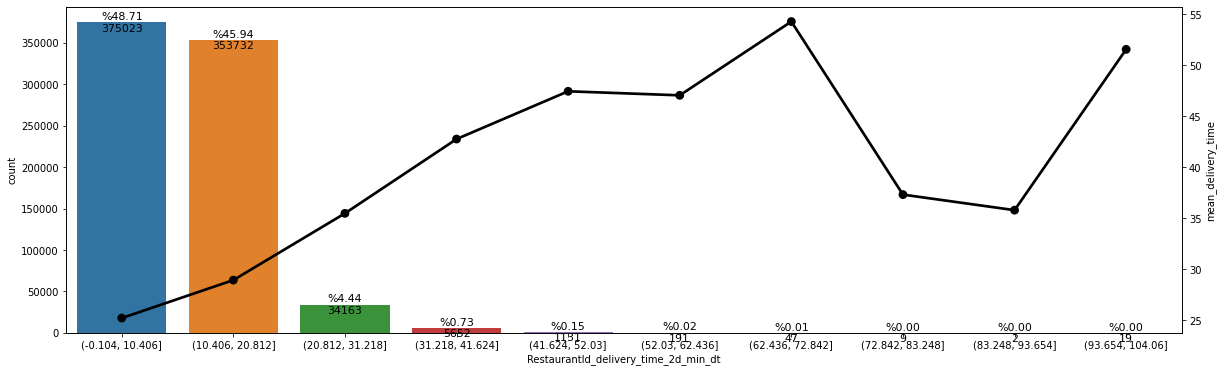

rank: 13; col: realtime_ongoing_order_number_CityId_DriverAssigned, rank: 13, imp: 0.021520715206861496
Unique num too huge: 281; cut to 10 categories


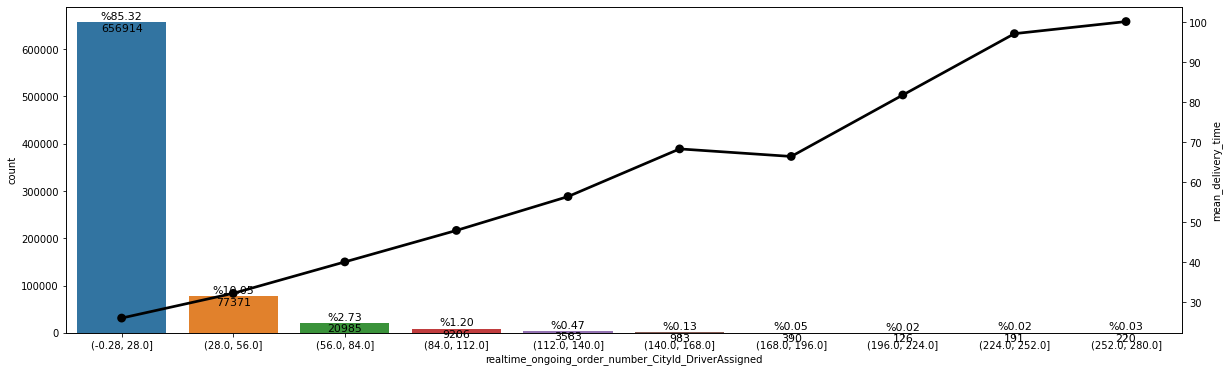

rank: 14; col: realtime_RestaurantId_30min_finished_order_num, rank: 14, imp: 0.02093075029551983


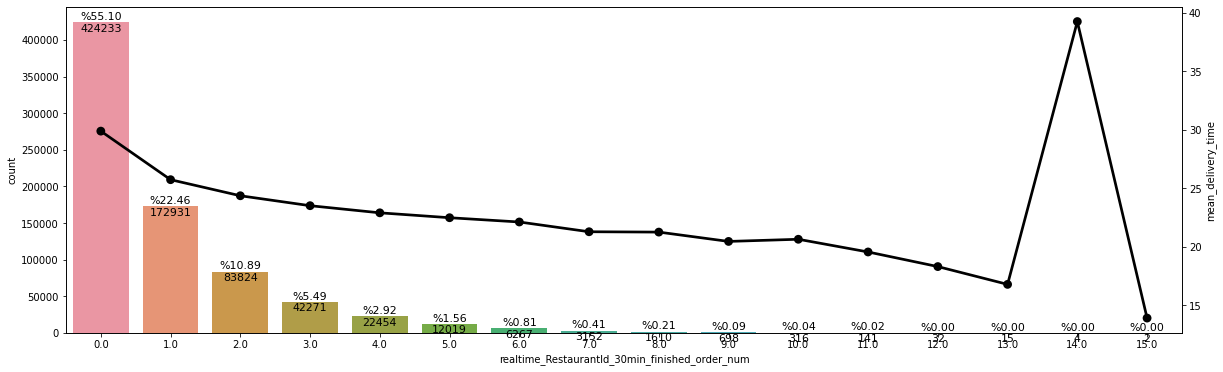

rank: 15; col: realtime_ongoing_order_number_RestaurantId_DriverAtTheRestaurant, rank: 15, imp: 0.019351186230778694


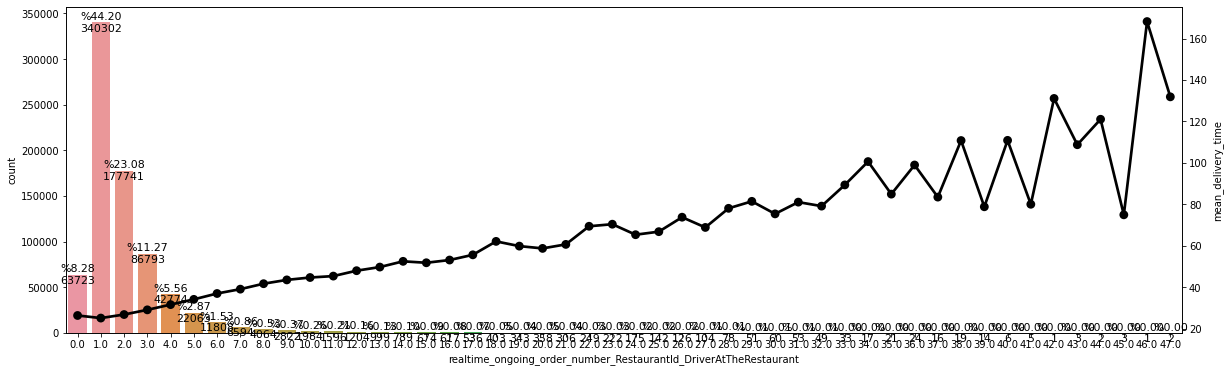

rank: 16; col: realtime_CityId_30min_finished_order_num, rank: 16, imp: 0.018548380583524704


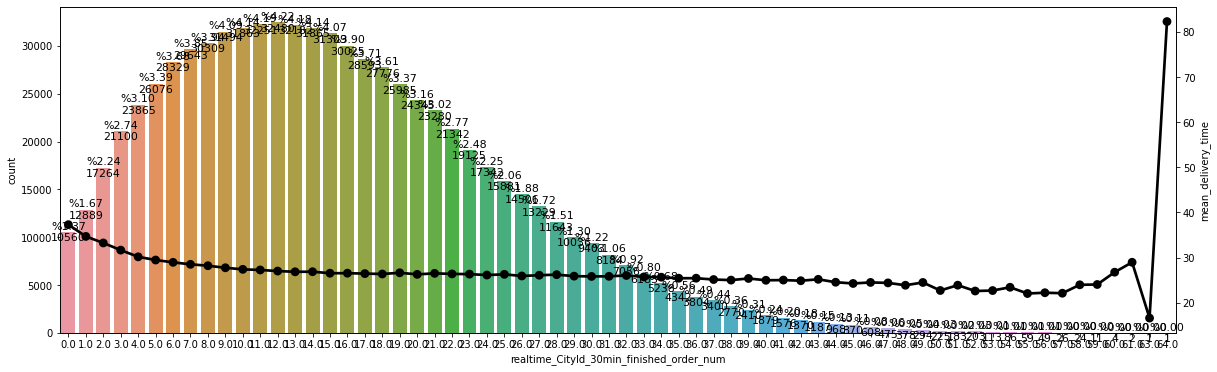

rank: 17; col: RestaurantId_delivery_time_7d_avg_dt, rank: 17, imp: 0.012671864591538906
Unique num too huge: 2251; cut to 10 categories


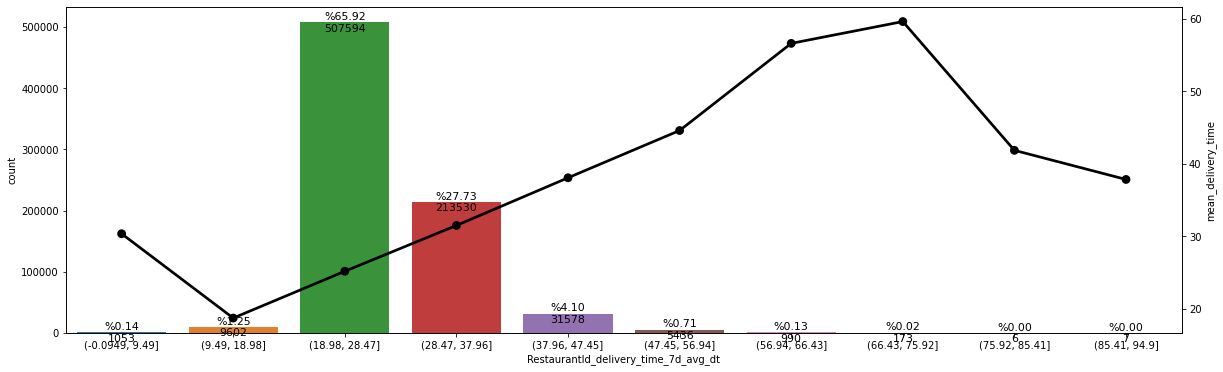

rank: 18; col: RestaurantId_delivery_time_14d_min_dt, rank: 18, imp: 0.012373506091535091
Unique num too huge: 1718; cut to 10 categories


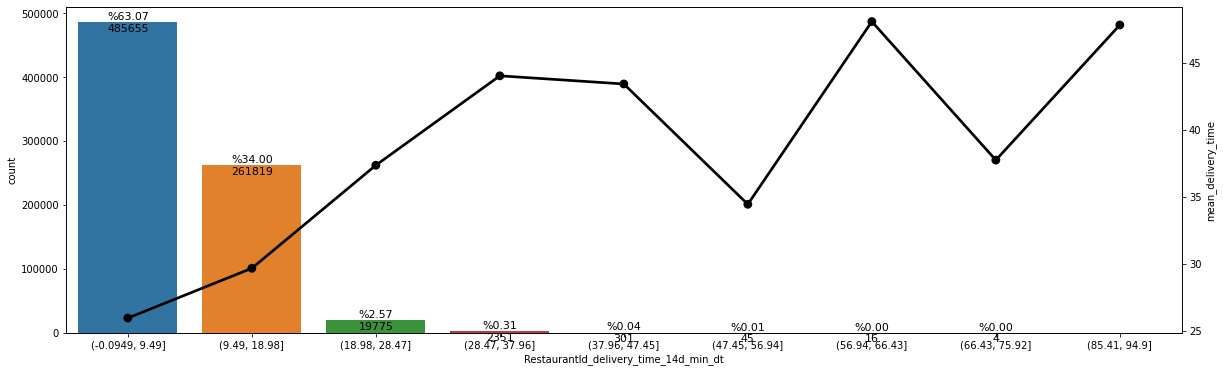

rank: 19; col: RestaurantId_delivery_time_2h_min_dt, rank: 19, imp: 0.012104540131986141
Unique num too huge: 2790; cut to 10 categories


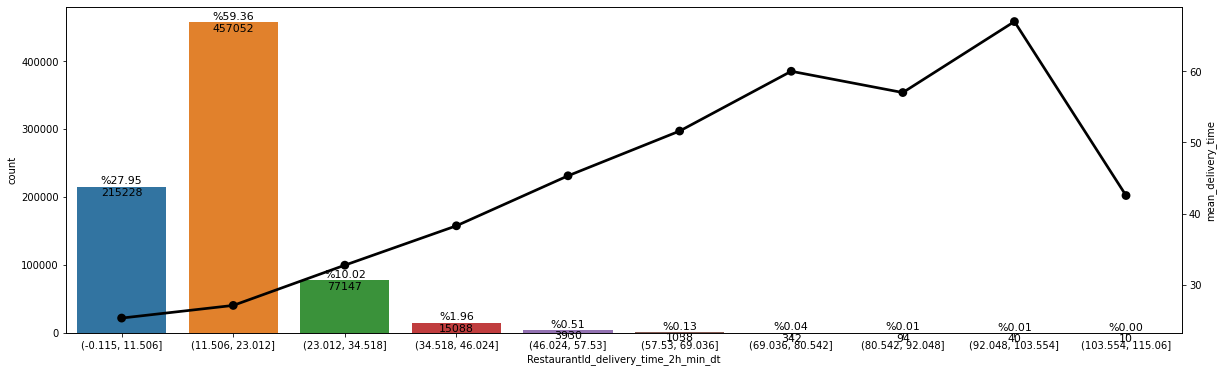

rank: 20; col: RestaurantId_delivery_time_7d_min_dt, rank: 20, imp: 0.011757811531424522
Unique num too huge: 1844; cut to 10 categories


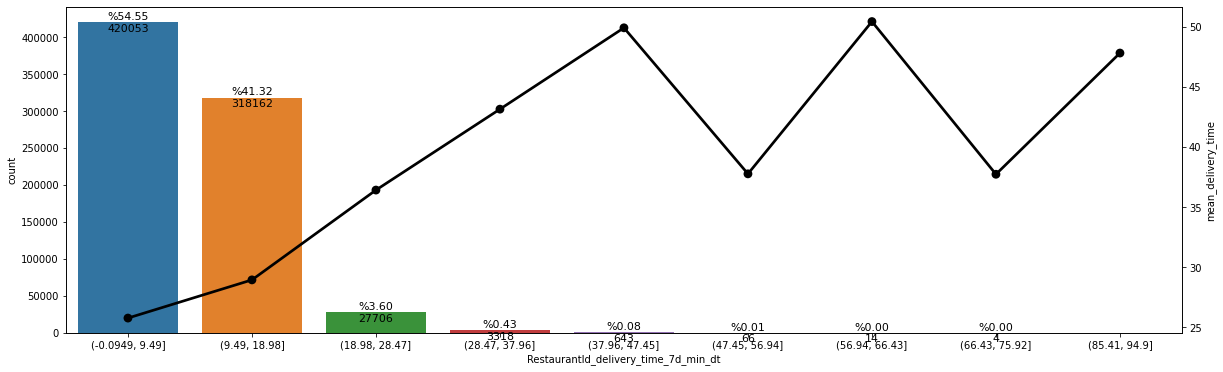

In [45]:
feature_num = 20
rank = 1
for row in feature_imp.head(feature_num).iterrows():
    col = row[1]['feature']
    imp = row[1]['importance']
    imp_rank = row[1]['imp_rank']
    print(f"rank: {rank}; col: {col}, rank: {imp_rank}, imp: {imp}")
    count_plot(df=df, col=col, regression_target=target, show_details=True)
    rank += 1

### Feature importance of diff category

In [75]:
def feature_analysis(cols):
    print(feature_imp[feature_imp['feature'].isin(cols)])#.sort_values(ascending=False)
    target_df = feature_imp[feature_imp['feature'].isin(cols)]
    if len(cols) >5:
        target_df = target_df.head(5)
    for row in target_df.iterrows():
    #     print(row)
    #     print(type(row))
        feature = row[1]['feature']
        imp = row[1]['importance']
        imp_rank = row[1]['imp_rank']
        print(f"features: {feature}; imp: {imp}; imp_rank: {imp_rank}")
        count_plot(df=df, col=feature, regression_target=target, show_details=True)

#### Income order & finished order number with '5min', '10min', '20min', '30min', '1h' 

                                         feature  importance  imp_rank
353  realtime_RestaurantId_20min_total_order_num    0.003269        36
349   realtime_RestaurantId_5min_total_order_num    0.001829        52
355  realtime_RestaurantId_30min_total_order_num    0.001144       103
351  realtime_RestaurantId_10min_total_order_num    0.001140       105
357     realtime_RestaurantId_1h_total_order_num    0.000880       172
features: realtime_RestaurantId_20min_total_order_num; imp: 0.003269041422754526; imp_rank: 36


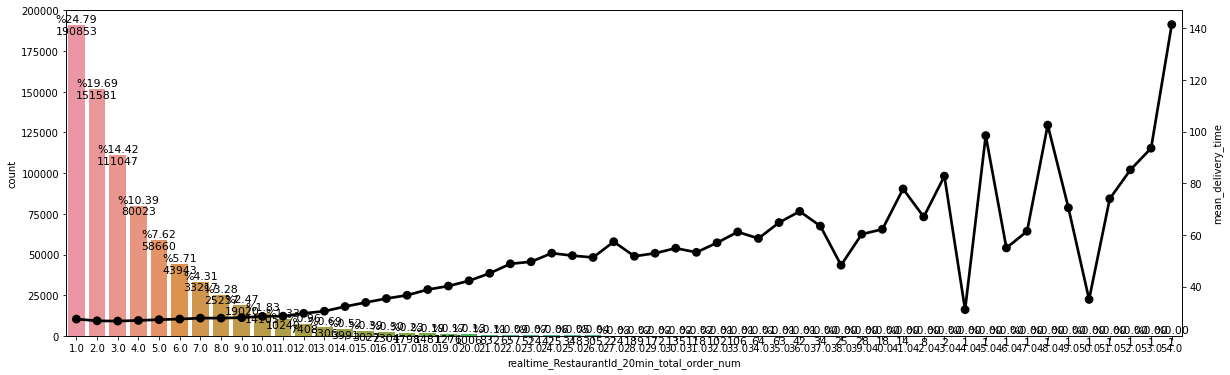

features: realtime_RestaurantId_5min_total_order_num; imp: 0.0018292453605681658; imp_rank: 52


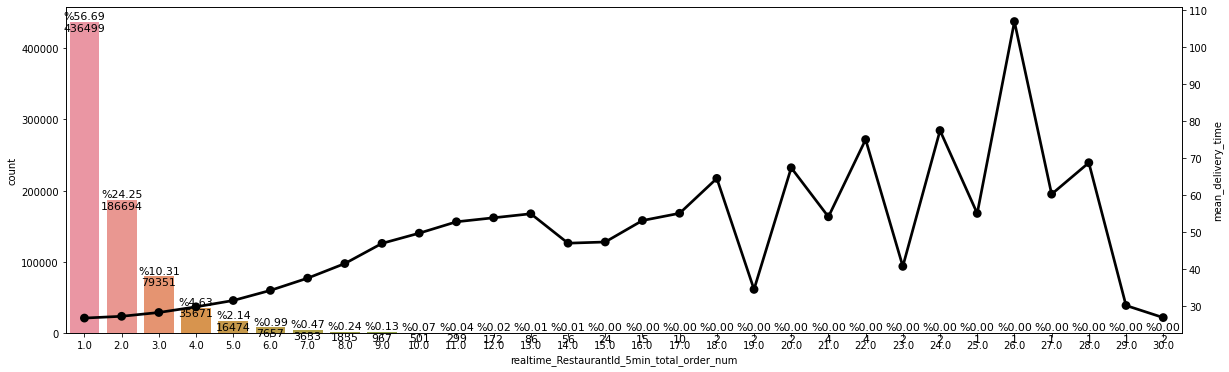

features: realtime_RestaurantId_30min_total_order_num; imp: 0.0011443737894296646; imp_rank: 103


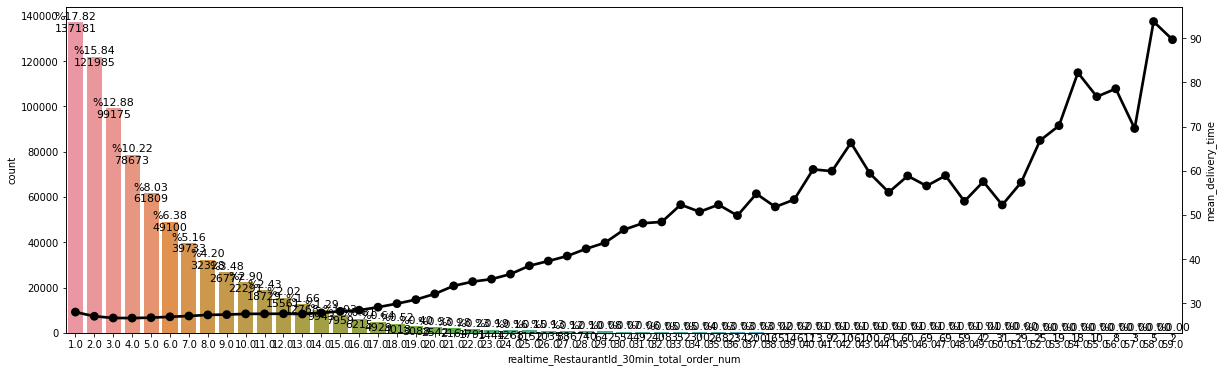

features: realtime_RestaurantId_10min_total_order_num; imp: 0.0011402769014239311; imp_rank: 105


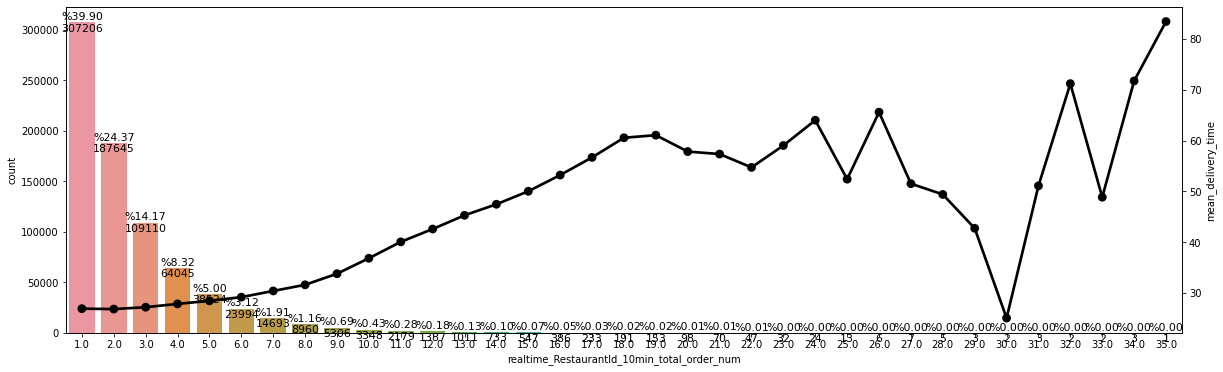

features: realtime_RestaurantId_1h_total_order_num; imp: 0.0008801141520962119; imp_rank: 172


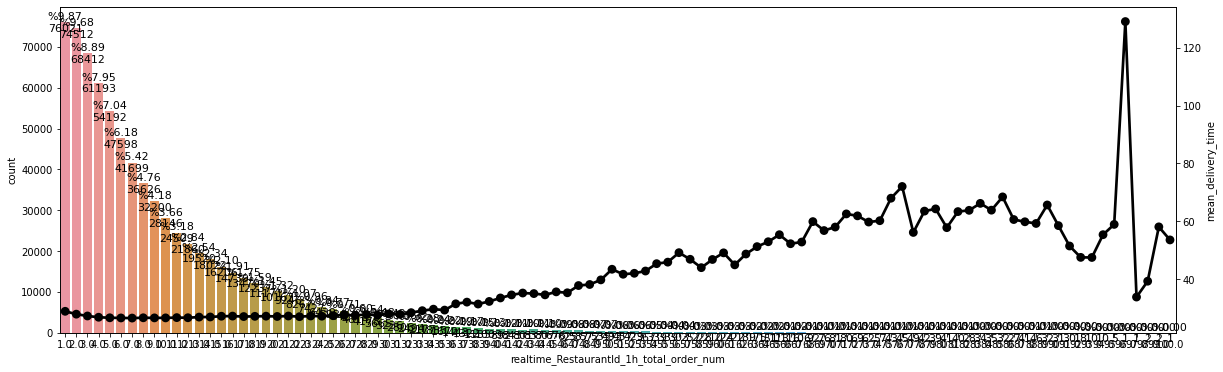

In [58]:
cols = [col for col in feature_cols if 'realtime' in col and 'total_order_num' in col and 'RestaurantId' in col]
feature_analysis(cols)

                                   feature  importance  imp_rank
367     realtime_CityId_1h_total_order_num    0.001092       118
361  realtime_CityId_10min_total_order_num    0.000894       166
365  realtime_CityId_30min_total_order_num    0.000807       200
363  realtime_CityId_20min_total_order_num    0.000779       215
359   realtime_CityId_5min_total_order_num    0.000722       237
features: realtime_CityId_1h_total_order_num; imp: 0.0010923929512500763; imp_rank: 118
Unique num too huge: 522; cut to 10 categories


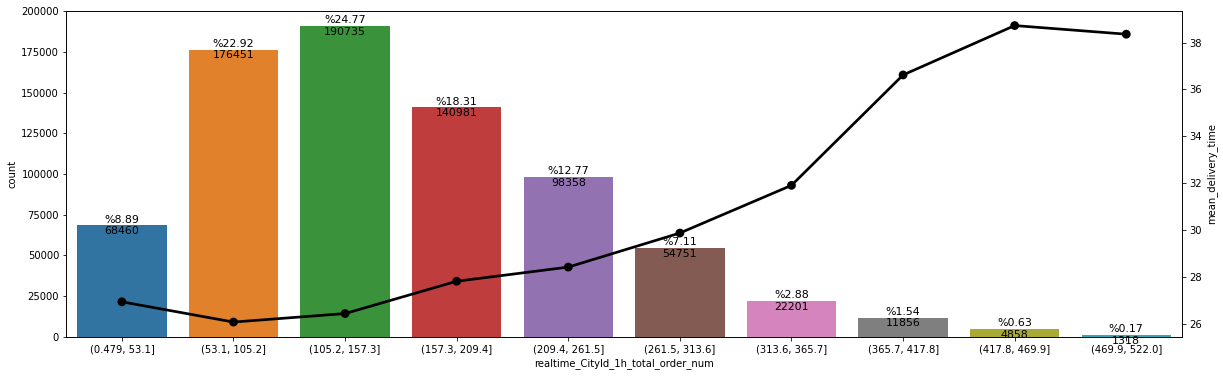

features: realtime_CityId_10min_total_order_num; imp: 0.0008938494138419628; imp_rank: 166
Unique num too huge: 106; cut to 10 categories


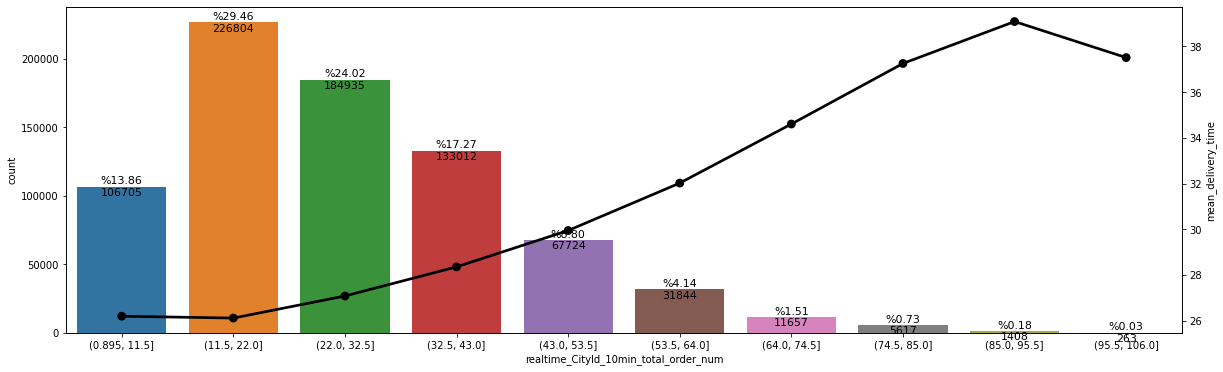

features: realtime_CityId_30min_total_order_num; imp: 0.0008070834446698427; imp_rank: 200
Unique num too huge: 285; cut to 10 categories


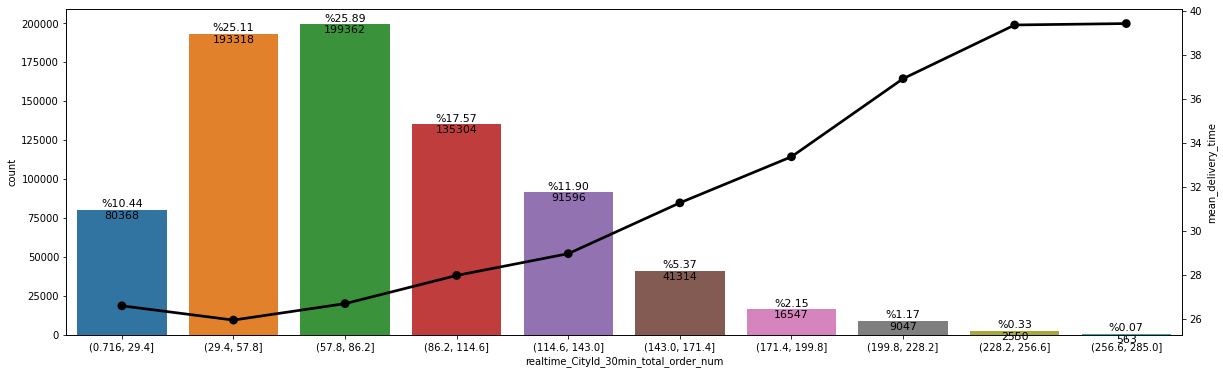

features: realtime_CityId_20min_total_order_num; imp: 0.0007786928326822817; imp_rank: 215
Unique num too huge: 198; cut to 10 categories


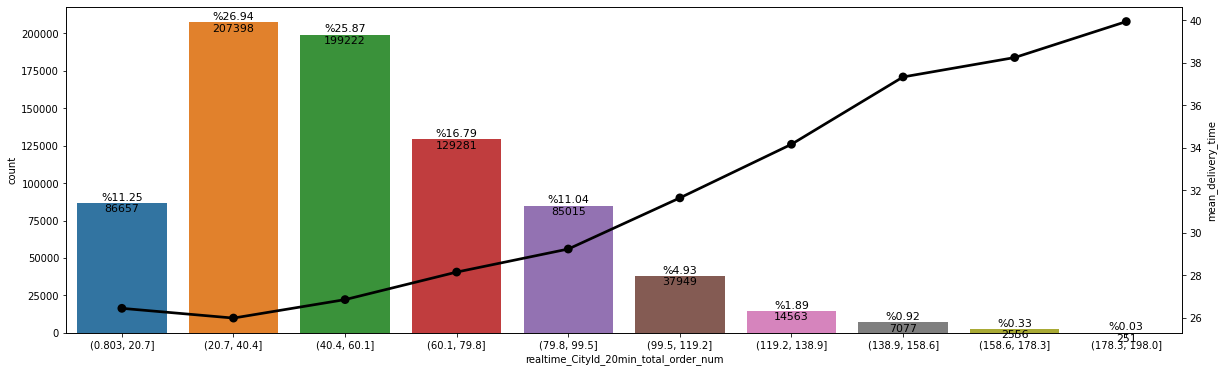

features: realtime_CityId_5min_total_order_num; imp: 0.0007215944351628423; imp_rank: 237


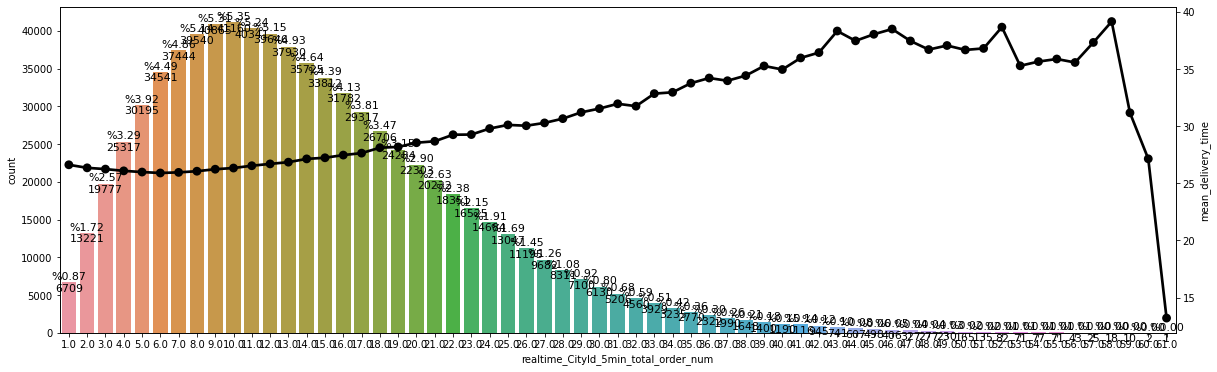

In [59]:
cols = [col for col in feature_cols if 'realtime' in col and 'total_order_num' in col and 'CityId' in col]
feature_analysis(cols)

#### Current unfinished order number in differnt stages 

In [52]:
cols = [col for col in feature_cols if 'ongoing' in col]
cols

['realtime_ongoing_order_number_CityId_DriverAssigned',
 'realtime_ongoing_order_number_CityId_DriverAtTheRestaurant',
 'realtime_ongoing_order_number_CityId_DriverLeftTheRestaurant',
 'realtime_ongoing_order_number_CityId_DriverAtTheDoor',
 'realtime_ongoing_order_number_CityId_Delivered',
 'realtime_ongoing_order_number_RestaurantId_DriverAssigned',
 'realtime_ongoing_order_number_RestaurantId_DriverAtTheRestaurant',
 'realtime_ongoing_order_number_RestaurantId_DriverLeftTheRestaurant',
 'realtime_ongoing_order_number_RestaurantId_DriverAtTheDoor',
 'realtime_ongoing_order_number_RestaurantId_Delivered']

                                               feature  importance  imp_rank
383  realtime_ongoing_order_number_CityId_DriverAss...    0.021521        13
384  realtime_ongoing_order_number_CityId_DriverAtT...    0.004226        33
385  realtime_ongoing_order_number_CityId_DriverLef...    0.002330        41
386  realtime_ongoing_order_number_CityId_DriverAtT...    0.001509        68
387     realtime_ongoing_order_number_CityId_Delivered    0.000757       225
features: realtime_ongoing_order_number_CityId_DriverAssigned; imp: 0.021520715206861496; imp_rank: 13
Unique num too huge: 281; cut to 10 categories


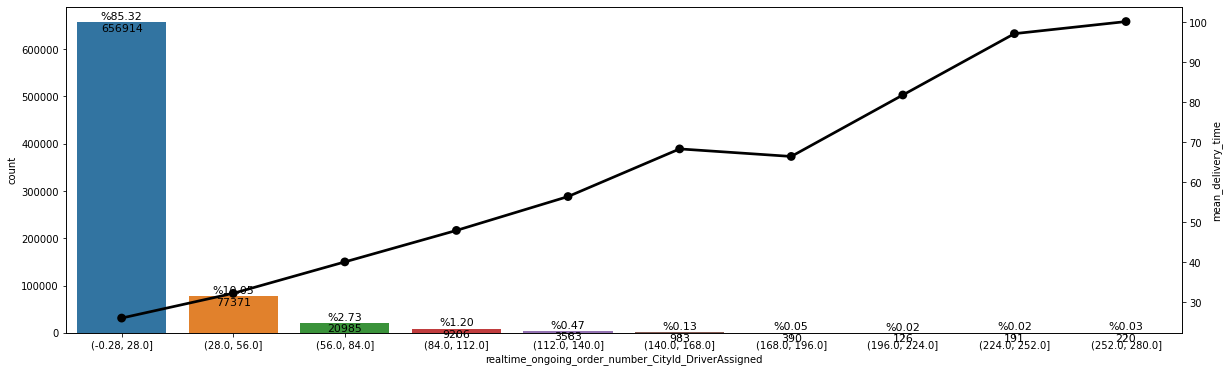

features: realtime_ongoing_order_number_CityId_DriverAtTheRestaurant; imp: 0.004225541837513447; imp_rank: 33
Unique num too huge: 224; cut to 10 categories


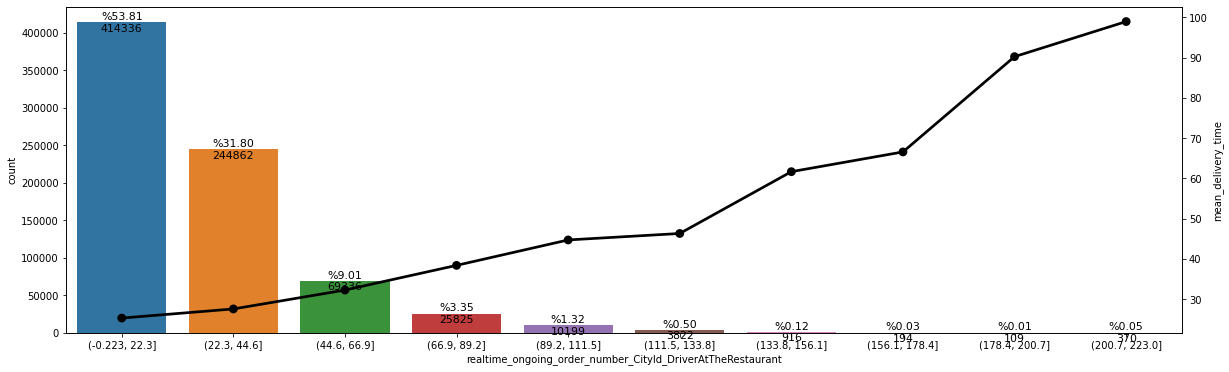

features: realtime_ongoing_order_number_CityId_DriverLeftTheRestaurant; imp: 0.0023298379965126514; imp_rank: 41
Unique num too huge: 312; cut to 10 categories


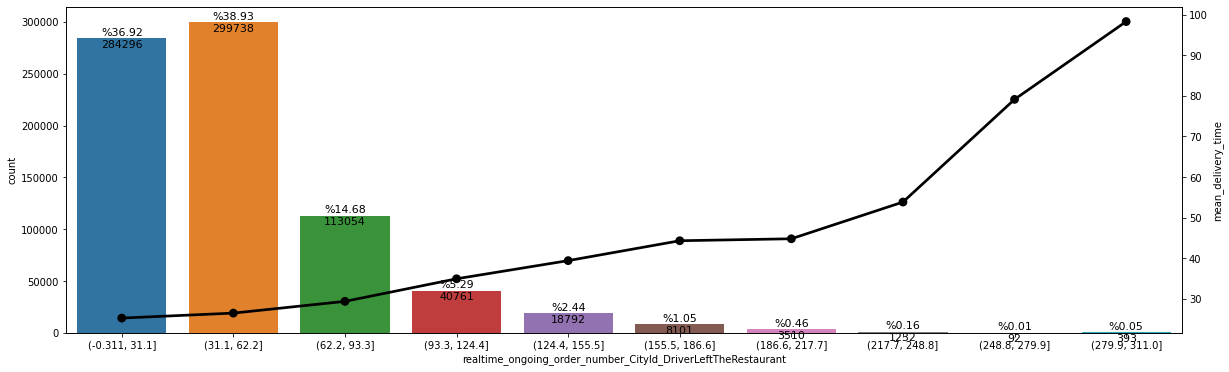

features: realtime_ongoing_order_number_CityId_DriverAtTheDoor; imp: 0.001509391819126904; imp_rank: 68
Unique num too huge: 345; cut to 10 categories


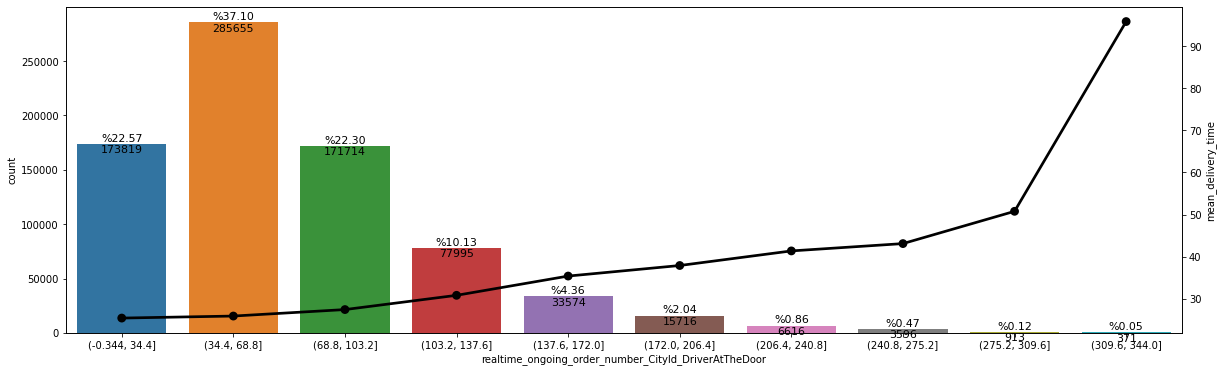

features: realtime_ongoing_order_number_CityId_Delivered; imp: 0.0007567176362499595; imp_rank: 225
Unique num too huge: 353; cut to 10 categories


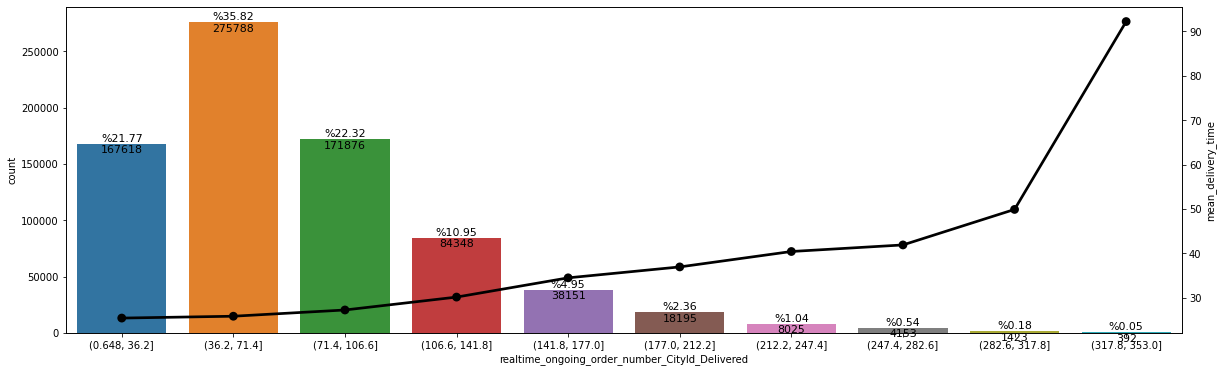

In [54]:
cols = [col for col in feature_cols if 'ongoing' in col and 'CityId' in col]
feature_analysis(cols)

                                               feature  importance  imp_rank
388  realtime_ongoing_order_number_RestaurantId_Dri...    0.078441         2
389  realtime_ongoing_order_number_RestaurantId_Dri...    0.019351        15
390  realtime_ongoing_order_number_RestaurantId_Dri...    0.010042        22
391  realtime_ongoing_order_number_RestaurantId_Dri...    0.001845        51
392  realtime_ongoing_order_number_RestaurantId_Del...    0.001710        59
features: realtime_ongoing_order_number_RestaurantId_DriverAssigned; imp: 0.07844091951847076; imp_rank: 2


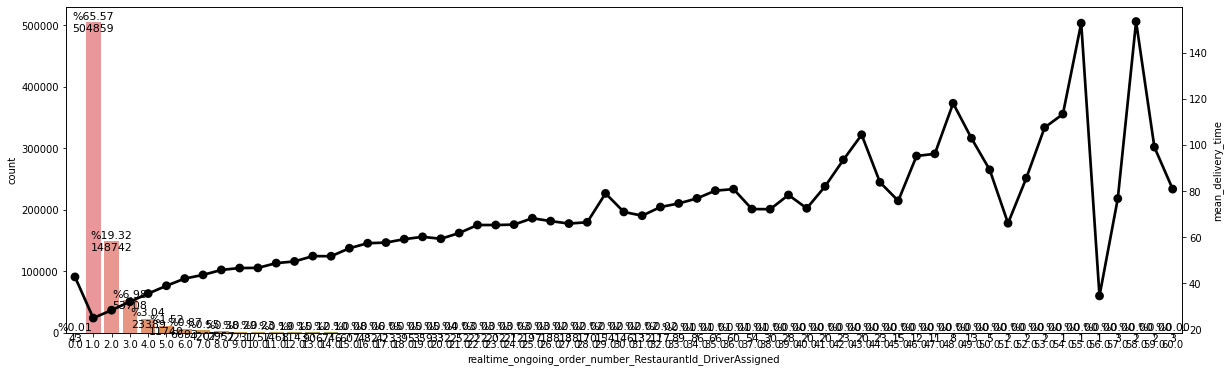

features: realtime_ongoing_order_number_RestaurantId_DriverAtTheRestaurant; imp: 0.019351186230778694; imp_rank: 15


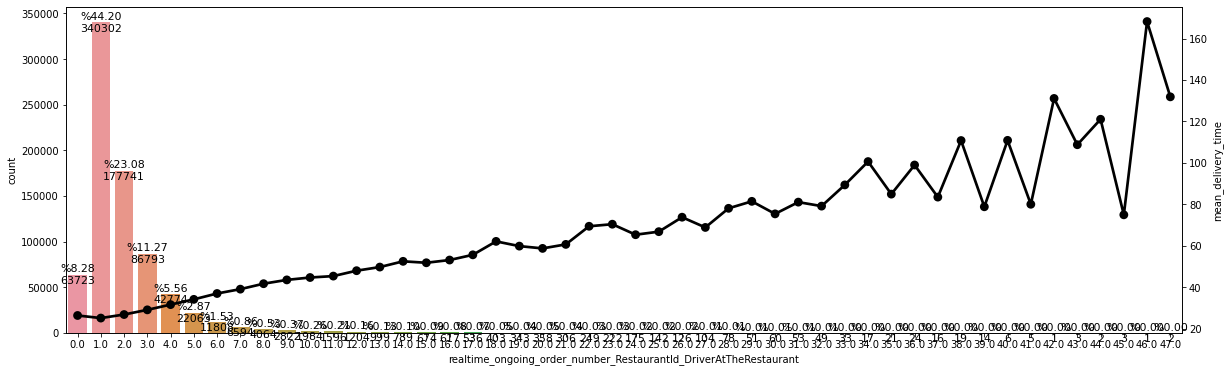

features: realtime_ongoing_order_number_RestaurantId_DriverLeftTheRestaurant; imp: 0.010042368434369564; imp_rank: 22


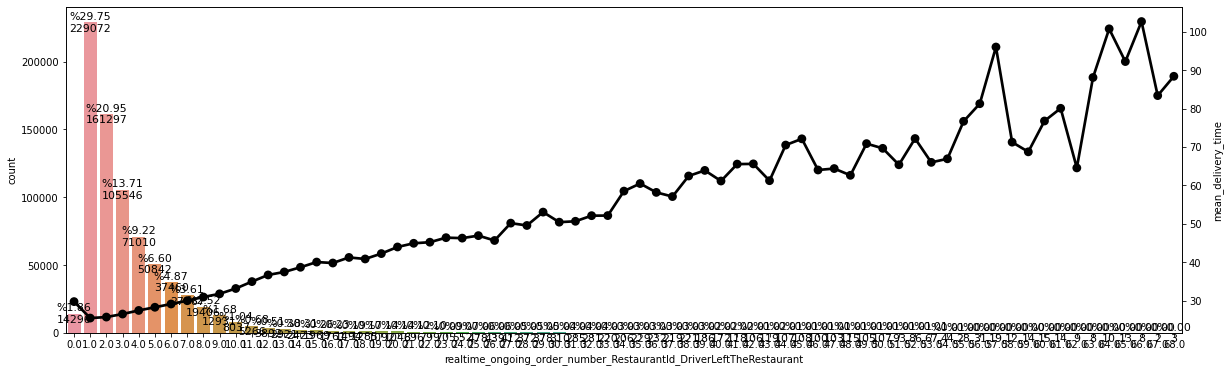

features: realtime_ongoing_order_number_RestaurantId_DriverAtTheDoor; imp: 0.0018448499031364918; imp_rank: 51


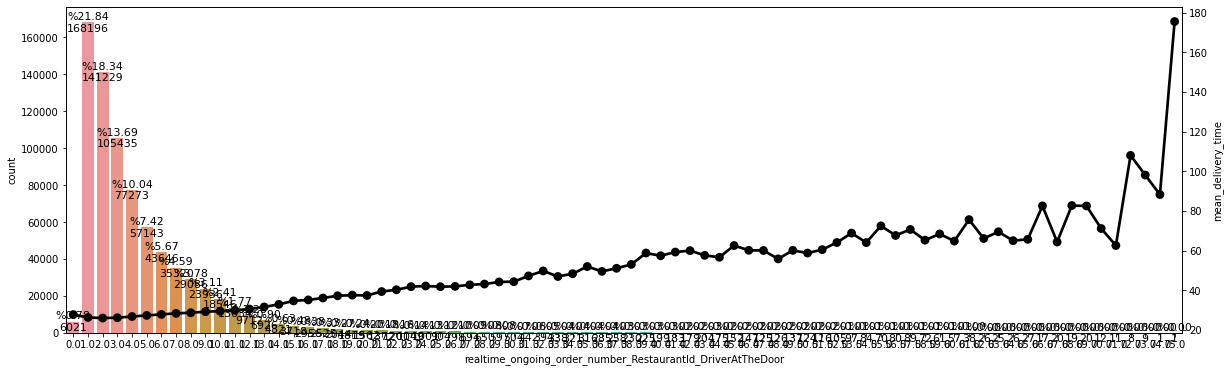

features: realtime_ongoing_order_number_RestaurantId_Delivered; imp: 0.001709609990939498; imp_rank: 59


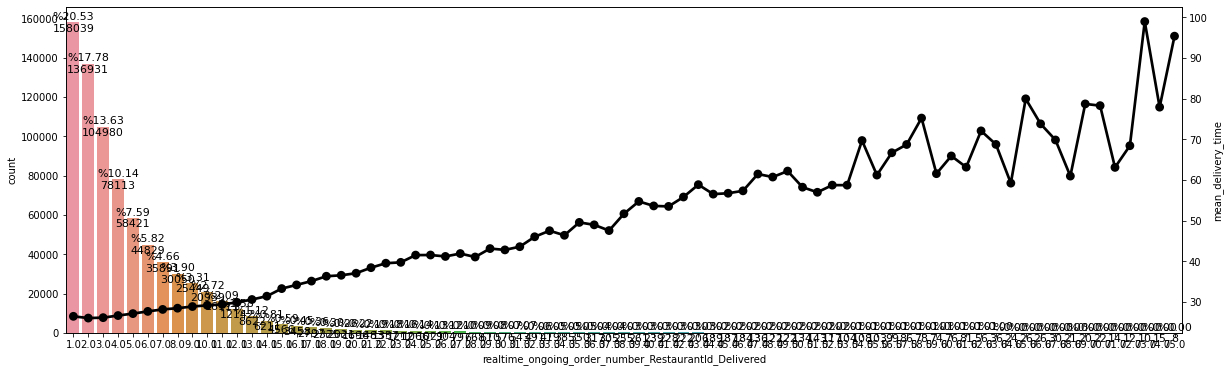

In [55]:
cols = [col for col in feature_cols if 'ongoing' in col and 'RestaurantId' in col]
feature_analysis(cols)

#### History average order number in specific time

In [63]:
cols = [col for col in feature_cols if 'dayofweek' in col]
cols

['dayofweek',
 'RestaurantIddayofweekhour_delivery_time_28d_avg_dt',
 'RestaurantIddayofweekhour_delivery_time_28d_max_dt',
 'RestaurantIddayofweekhour_delivery_time_28d_min_dt',
 'CityIddayofweekhour_delivery_time_28d_avg_dt',
 'CityIddayofweekhour_delivery_time_28d_max_dt',
 'CityIddayofweekhour_delivery_time_28d_min_dt']

                                               feature  importance  imp_rank
393  RestaurantIddayofweekhour_delivery_time_28d_av...    0.024205        11
395  RestaurantIddayofweekhour_delivery_time_28d_mi...    0.004280        32
394  RestaurantIddayofweekhour_delivery_time_28d_ma...    0.002305        43
features: RestaurantIddayofweekhour_delivery_time_28d_avg_dt; imp: 0.024204809218645096; imp_rank: 11
Unique num too huge: 3061; cut to 10 categories


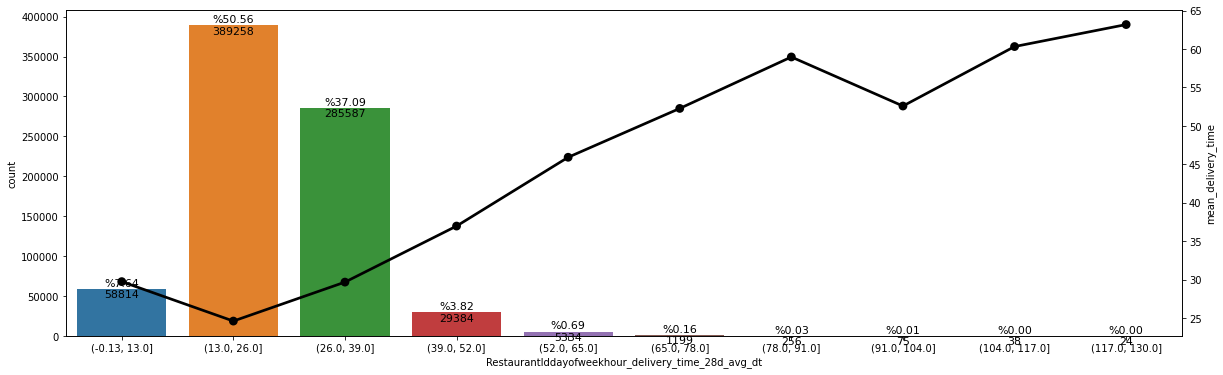

features: RestaurantIddayofweekhour_delivery_time_28d_min_dt; imp: 0.004280244931578636; imp_rank: 32
Unique num too huge: 2675; cut to 10 categories


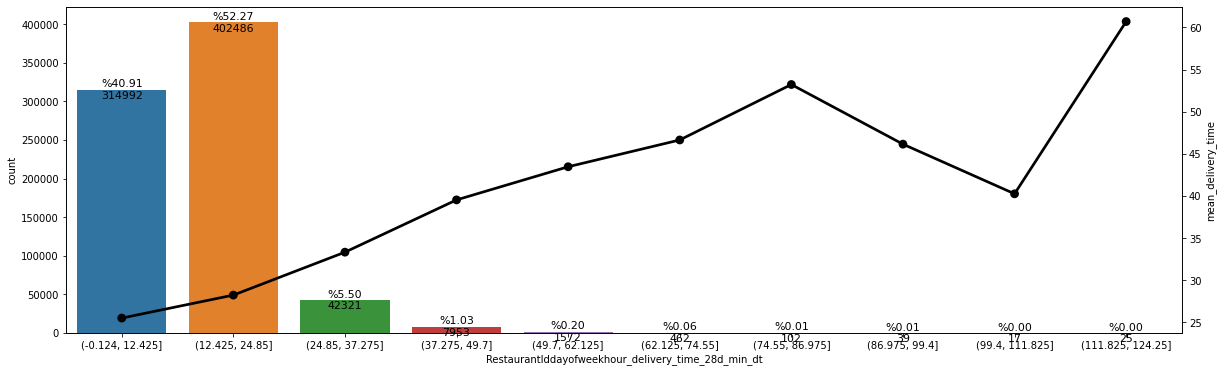

features: RestaurantIddayofweekhour_delivery_time_28d_max_dt; imp: 0.0023046371061354876; imp_rank: 43
Unique num too huge: 3305; cut to 10 categories


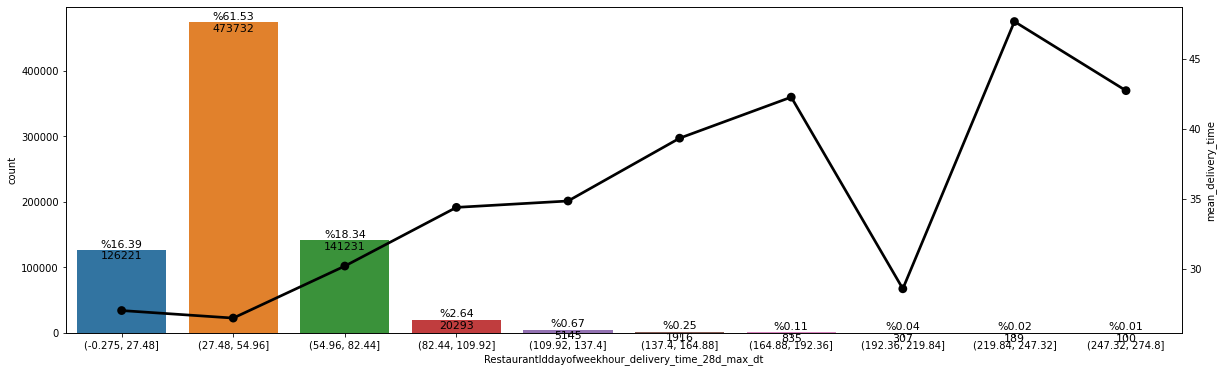

In [64]:
cols = [col for col in feature_cols if 'RestaurantIddayofweekhour' in col]
feature_analysis(cols)

                                          feature  importance  imp_rank
397  CityIddayofweekhour_delivery_time_28d_max_dt    0.001420        76
398  CityIddayofweekhour_delivery_time_28d_min_dt    0.001408        77
396  CityIddayofweekhour_delivery_time_28d_avg_dt    0.001071       125
features: CityIddayofweekhour_delivery_time_28d_max_dt; imp: 0.001419784384779632; imp_rank: 76
Unique num too huge: 2791; cut to 10 categories


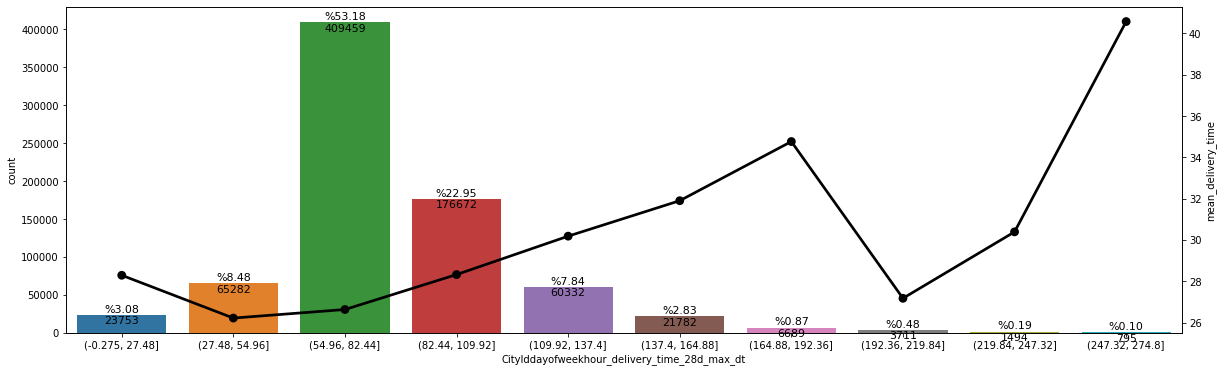

features: CityIddayofweekhour_delivery_time_28d_min_dt; imp: 0.0014075542567297816; imp_rank: 77
Unique num too huge: 941; cut to 10 categories


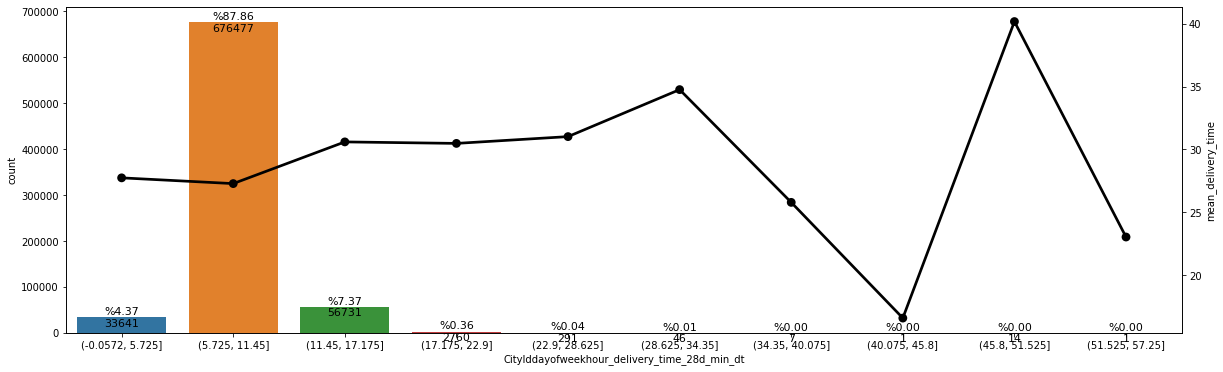

features: CityIddayofweekhour_delivery_time_28d_avg_dt; imp: 0.0010711494833230972; imp_rank: 125
Unique num too huge: 1967; cut to 10 categories


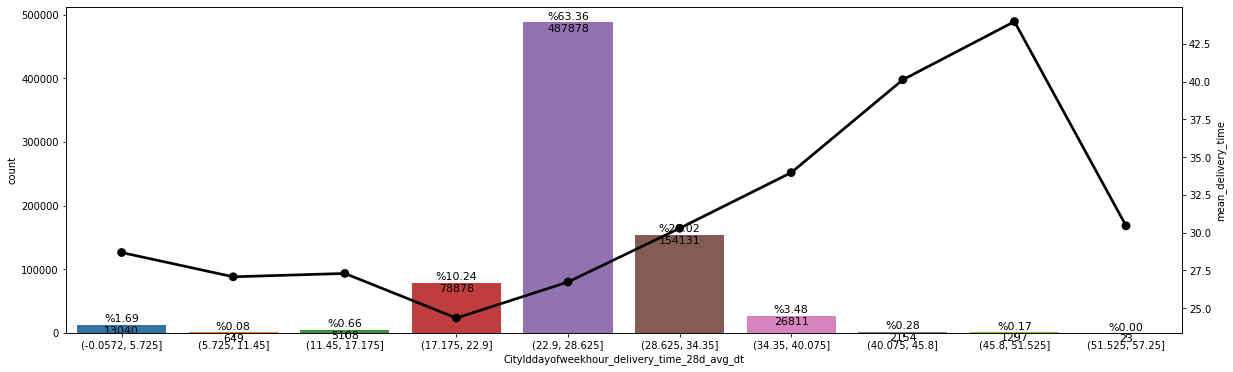

In [66]:
cols = [col for col in feature_cols if 'CityIddayofweekhour' in col]
feature_analysis(cols)

####  History time for different stages

                                               feature  importance  imp_rank
16   RestaurantId_diff_NewOrder_DriverAssigned_30mi...    0.032100         8
13   RestaurantId_diff_NewOrder_DriverAssigned_20mi...    0.028930         9
43   RestaurantId_diff_NewOrder_DriverAssigned_30d_...    0.003679        34
28   RestaurantId_diff_NewOrder_DriverAssigned_1d_a...    0.002277        46
19   RestaurantId_diff_NewOrder_DriverAssigned_1h_a...    0.001829        53
..                                                 ...         ...       ...
121  RestaurantId_diff_DriverAtTheRestaurant_Driver...    0.000000       368
91   RestaurantId_diff_DriverAssigned_DriverAtTheRe...    0.000000       380
238  RestaurantId_diff_DriverAtTheDoor_Delivered_10...    0.000000       383
94   RestaurantId_diff_DriverAssigned_DriverAtTheRe...    0.000000       386
97   RestaurantId_diff_DriverAssigned_DriverAtTheRe...    0.000000       396

[65 rows x 3 columns]
features: RestaurantId_diff_NewOrder_DriverAssigned_3

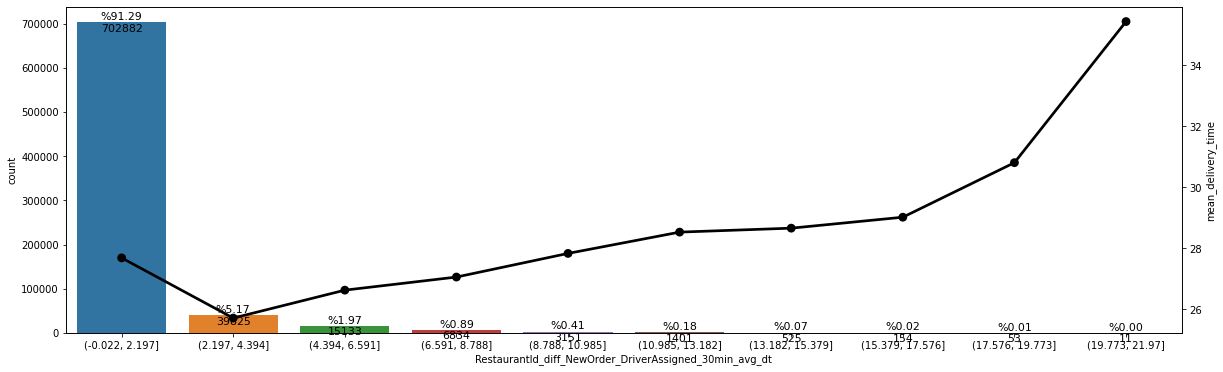

features: RestaurantId_diff_NewOrder_DriverAssigned_20min_avg_dt; imp: 0.028930259868502617; imp_rank: 9
Unique num too huge: 735; cut to 10 categories


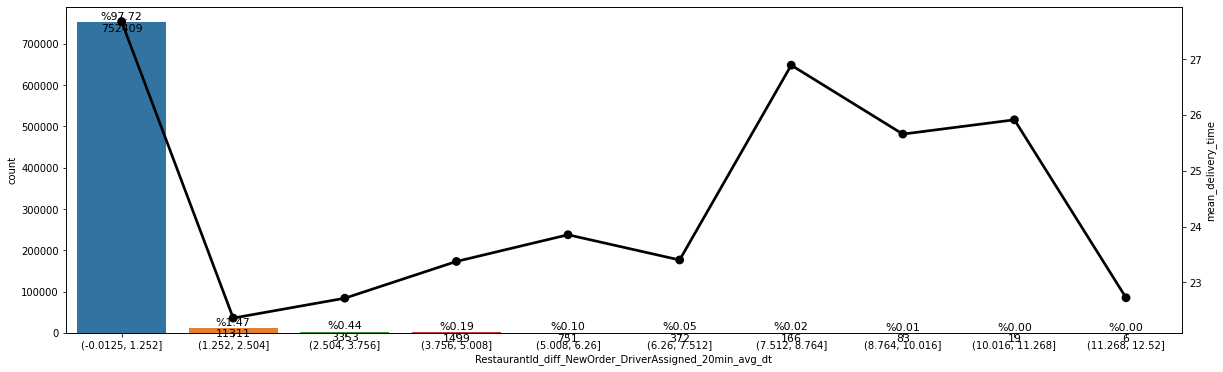

features: RestaurantId_diff_NewOrder_DriverAssigned_30d_avg_dt; imp: 0.003679243614897132; imp_rank: 34
Unique num too huge: 2826; cut to 10 categories


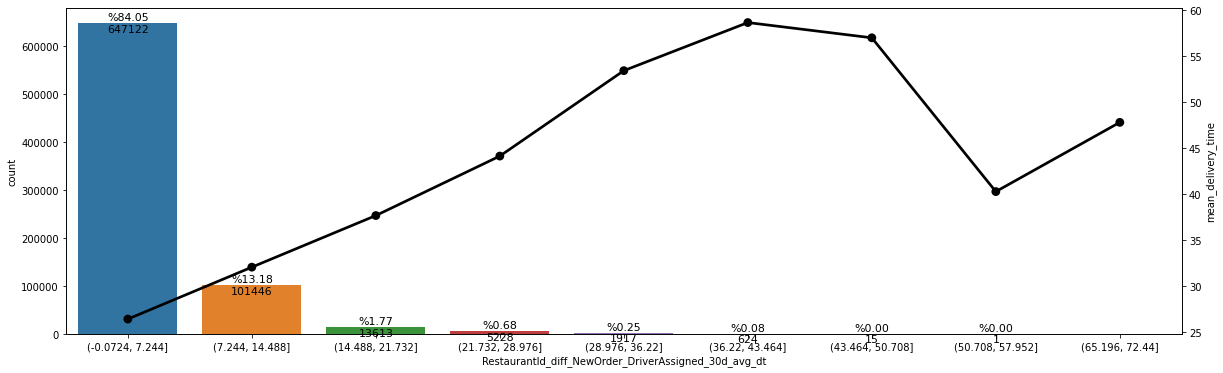

features: RestaurantId_diff_NewOrder_DriverAssigned_1d_avg_dt; imp: 0.002276887185871601; imp_rank: 46
Unique num too huge: 3303; cut to 10 categories


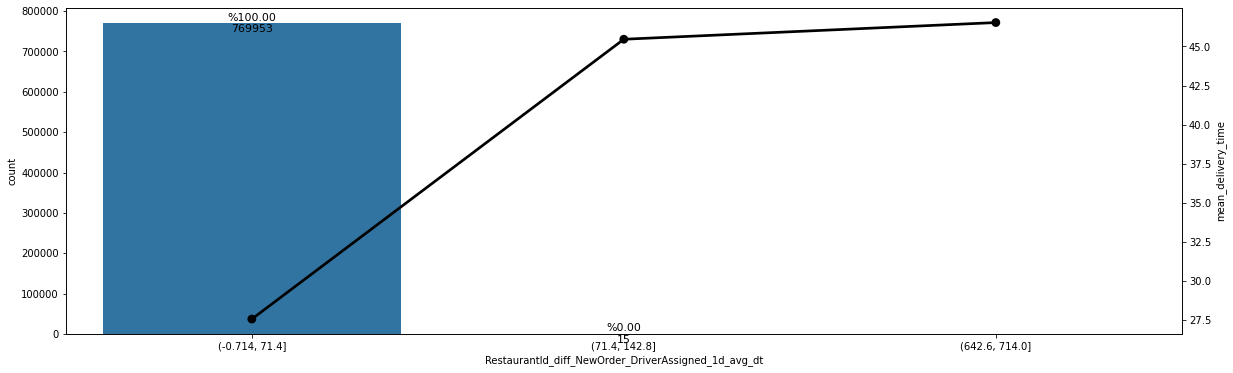

features: RestaurantId_diff_NewOrder_DriverAssigned_1h_avg_dt; imp: 0.001829241868108511; imp_rank: 53
Unique num too huge: 2833; cut to 10 categories


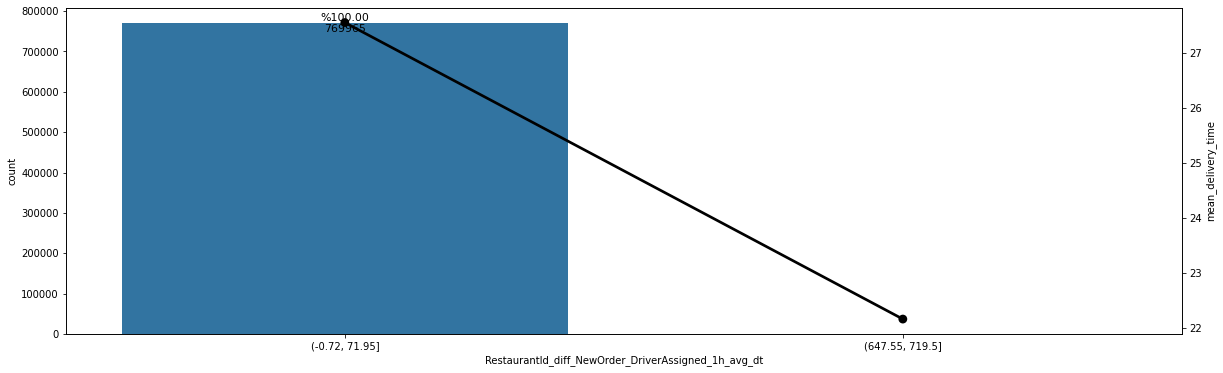

In [76]:
cols = [col for col in feature_cols if 'RestaurantId_diff' in col and 'avg' in col]
feature_analysis(cols)
# cols?